# Importing the needed libraries

In [28]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns

from sklearn import datasets
from sklearn.model_selection import train_test_split, KFold
from sklearn.preprocessing import Normalizer
from sklearn.metrics import accuracy_score
from sklearn.neighbors import KNeighborsClassifier

from collections import Counter

# Exploring the dataset

We are going to use a very famous dataset called Iris

##### Attributes:
1. sepal length in cm 
2. sepal width in cm 
3. petal length in cm 
4. petal width in cm 

We will just use two features for easier visualization; sepal length and width.

##### class: 
* Iris Setosa 
* Iris Versicolour 
* Iris Virginica

# Load the Dataset

In [29]:
# Importing iris dataset
iris = datasets.load_iris()
iris_df = pd.DataFrame(data = np.c_[iris['data'], iris['target']],
                       columns = iris['feature_names'] + ['target'])
iris_df.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
0,5.1,3.5,1.4,0.2,0.0
1,4.9,3.0,1.4,0.2,0.0
2,4.7,3.2,1.3,0.2,0.0
3,4.6,3.1,1.5,0.2,0.0
4,5.0,3.6,1.4,0.2,0.0


# Describe the dataset

In [30]:
iris_df.describe()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
count,150.000000,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.057333,3.758000,1.199333,1.000000
std,0.828066,0.435866,1.765298,0.762238,0.819232
min,4.300000,2.000000,1.000000,0.100000,0.000000
25%,5.100000,2.800000,1.600000,0.300000,0.000000
50%,5.800000,3.000000,4.350000,1.300000,1.000000
75%,6.400000,3.300000,5.100000,1.800000,2.000000
max,7.900000,4.400000,6.900000,2.500000,2.000000


# Split into X and y

In [31]:
X = iris_df.iloc[:, :-1]
y = iris_df.iloc[:, -1]

In [32]:
X.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


In [33]:
y.head()

0    0.0
1    0.0
2    0.0
3    0.0
4    0.0
Name: target, dtype: float64

# Split into training and testing

In [34]:
# Split the data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y,
                                                    test_size = 0.2,
                                                    shuffle = True,
                                                    random_state = 0)
X_train = np.asarray(X_train)
y_train = np.asarray(y_train)

X_test = np.asarray(X_test)
y_test = np.asarray(y_test)

In [35]:
print(f"training set size: {X_train.shape[0]} samples \ntest set size: {X_test.shape[0]}")

training set size: 120 samples 
test set size: 30


# Normalize the dataset

In [36]:
# The scaler is fitted to the training set
scaler = Normalizer().fit(X_train)
# The scaler is applied to the training set
normalized_X_train = scaler.transform(X_train)
# The scaler is applied to the test set
normalized_X_test = scaler.transform(X_test)

In [37]:
print("X train before Normalization")
print(X_train[0:5])
print("\nX train after Normalization")
print(normalized_X_train[0:5])

X train before Normalization
[[6.4 3.1 5.5 1.8]
 [5.4 3.  4.5 1.5]
 [5.2 3.5 1.5 0.2]
 [6.1 3.  4.9 1.8]
 [6.4 2.8 5.6 2.2]]

X train after Normalization
[[0.69804799 0.338117   0.59988499 0.196326  ]
 [0.69333409 0.38518561 0.57777841 0.1925928 ]
 [0.80641965 0.54278246 0.23262105 0.03101614]
 [0.71171214 0.35002236 0.57170319 0.21001342]
 [0.69417747 0.30370264 0.60740528 0.2386235 ]]


# Visualize the dataset before and after normalization

Text(0.5, 0.98, 'Pair Plot of the dataset after normalization')

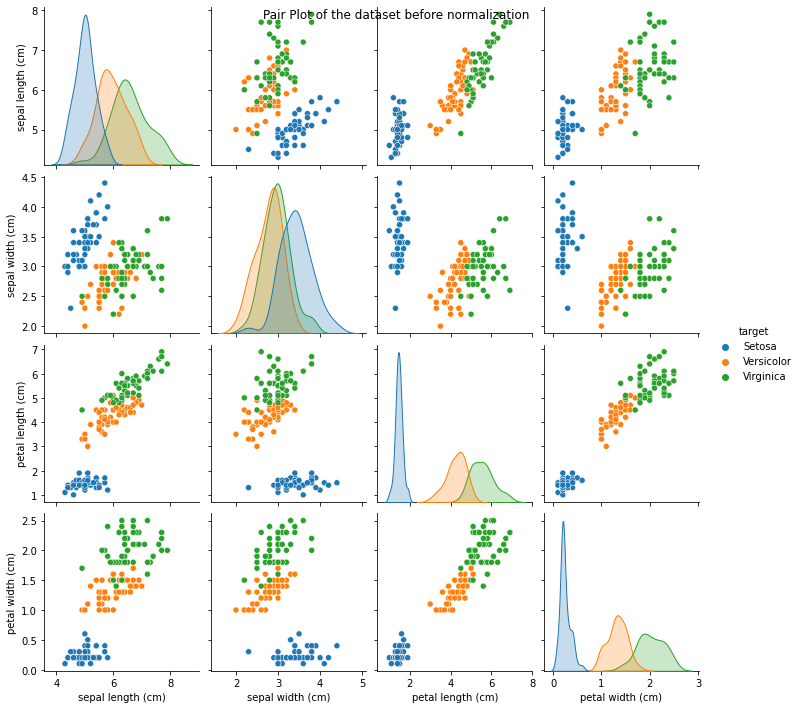

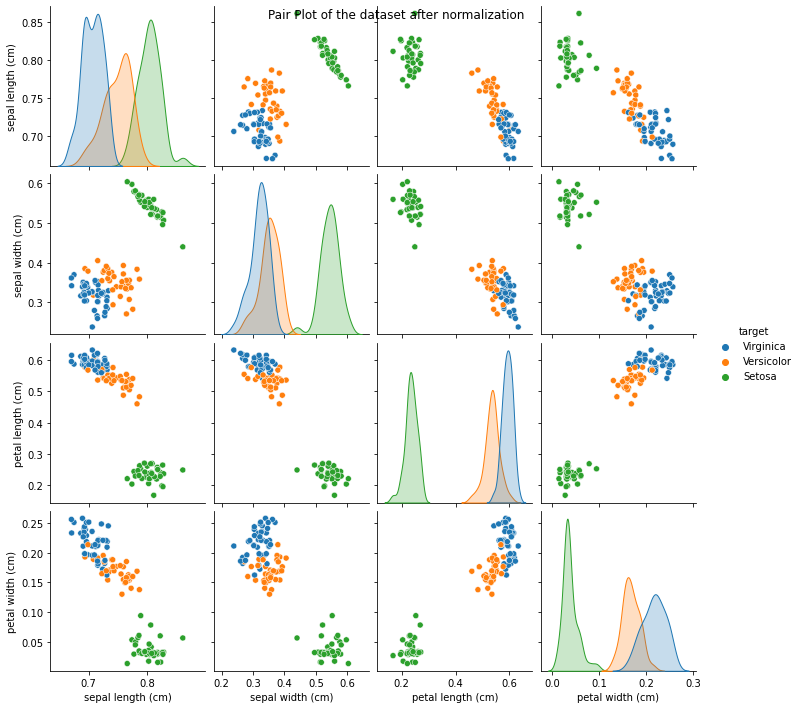

In [38]:
# View the relationship between variables; color code by species type
dic = {0.0: "Setosa", 1.0: "Versicolor", 2.0: "Virginica"}

# Before
before = sns.pairplot(iris_df.replace({"target": dic}), hue='target')
before.fig.suptitle("Pair Plot of the dataset before normalization")

# After
iris_df_2 = pd.DataFrame(data = np.c_[normalized_X_train, y_train],
                       columns = iris['feature_names'] + ['target'])

after = sns.pairplot(iris_df_2.replace({"target": dic}), hue='target')
after.fig.suptitle("Pair Plot of the dataset after normalization")

# KNN Step 1 (Calculate the distance using Euclidean distance)

In [39]:
def distance_euc(x_train, x_test_point):
  """
  Input:
    - x_train: corresponding to the training data.
    - x_test_point: corresponding to the test point.
  
  Output:
    - distances: The distances between the test point and each point in the training data.
  """
  distances = []
  # Loop over the rows of X train
  for row in range(len(x_train)):
    # Get them point by point
    current_train_point = x_train[row]
    # Initialize the distance by zero
    current_distance = 0

    # Loop over the columns of the row
    for col in range(len(current_train_point)):
      current_distance += (current_train_point[col] - x_test_point[col])**2
      ## Or current_distance = current_distance + (x_train[i] - x_test_point[i])**2
    
    current_distance = np.sqrt(current_distance)
    # Append the distances!
    distances.append(current_distance)

  # Stores distances in a dataframe
  distances = pd.DataFrame(data = distances, columns = ['dist'])
  return distances

# KNN Step 2 (Find the nearest neighbors)

In [40]:
def nearest_neighbors(distance_point, K):
  """
  Input:
    - distance_point: The distances between the test point and each point in the training data.
    - K: The number of neighbors.
  
  Output:
    - df_nearest: The nearest K neighbors between the test point and the training data.
  """
  # Sort distances using the sort_values function
  df_nearest = distance_point.sort_values(by = ['dist'], axis = 0)
  # Take only the first K neighbors
  df_nearest = df_nearest[:K]
  return df_nearest

# KNN Step 3 (Classify the point based on a majority vote)

In [41]:
def voting(df_nearest, y_train):
  """
  Input:
    - df_nearest: Dataframe contains the nearest K neighbors between the Full training dataset and the test point.
    - y_train: The labels of the training dataset.
  
  Output:
    - y_pred: The prediction based on the Majority Voting.
  """
  # Use the Counter Object to get the labels with K nearest neighbors
  counter_vote = Counter(y_train[df_nearest.index])
  # Majority Voting!
  y_pred = counter_vote.most_common()[0][0]
  return y_pred

# KNN Full Algorithm: Putting Everything Together

In [42]:
def KNN_from_scratch(x_train, y_train, x_test, K):
  """
  Input:
    - x_train: The full training dataset.
    - y_train: The labels of the training dataset.
    - x_test: The full test dataset.
    - K: The number of neighbors.
  
  Output:
    - y_pred: The prediction for the whole test set based on Majority Voting.
  """
  y_pred = []
  # Loop over all the test set and perform the three steps
  for x_test_point in x_test:
    # Step 1
    distance_point = distance_euc(x_train, x_test_point)
    # Step 2
    df_nearest_point = nearest_neighbors(distance_point, K)
    # Step 3
    y_pred_point = voting(df_nearest_point, y_train)
    y_pred.append(y_pred_point)
  
  return y_pred

# Test the KNN Algorithm on the test dataset

In [43]:
K = 3
y_pred_scratch = KNN_from_scratch(normalized_X_train, y_train, normalized_X_test, K)
print(y_pred_scratch)

[2.0, 1.0, 0.0, 2.0, 0.0, 2.0, 0.0, 1.0, 1.0, 1.0, 2.0, 1.0, 1.0, 1.0, 1.0, 0.0, 1.0, 2.0, 0.0, 0.0, 2.0, 1.0, 0.0, 0.0, 2.0, 0.0, 0.0, 1.0, 1.0, 0.0]


# Compare the implementation with Sklearn library

In [44]:
knn = KNeighborsClassifier(K)
knn.fit(normalized_X_train, y_train)
y_pred_sklearn = knn.predict(normalized_X_test)
print(y_pred_sklearn)

[2. 1. 0. 2. 0. 2. 0. 1. 1. 1. 2. 1. 1. 1. 1. 0. 1. 2. 0. 0. 2. 1. 0. 0.
 2. 0. 0. 1. 1. 0.]


# Check if the output is exactly the same

In [45]:
print(np.array_equal(y_pred_scratch, y_pred_sklearn))

True


# Calculate the accuracy of both methods

In [46]:
print(f'The accuracy of the implementation is {accuracy_score(y_test, y_pred_scratch)}')
print(f'The accuracy of sklearn implementation is {accuracy_score(y_test, y_pred_sklearn)}')

The accuracy of the implementation is 0.9666666666666667
The accuracy of sklearn implementation is 0.9666666666666667


# Perform hyper-parameters tuning using K-fold Cross Validation

In [47]:
# Choose the number of splits
n_splits = 4
# Call the K fold function
kf = KFold(n_splits=n_splits)
# Keep track of the Accuracy for each K
accuracy_k = []
# Search for the best value of K
k_values = list(range(1, 30, 2))
# Loop over the K values
for k in k_values:
  accuracy_fold = 0
  # Loop over the splits
  for normalized_X_train_fold_idx, normalized_X_valid_fold_idx in kf.split(normalized_X_train):
    # Fetch the values
    normalized_X_train_fold = normalized_X_train[normalized_X_train_fold_idx]
    y_train_fold = y_train[normalized_X_train_fold_idx]

    normalized_X_valid_fold = normalized_X_train[normalized_X_valid_fold_idx]
    y_valid_fold = y_train[normalized_X_valid_fold_idx]
    # Get the predicted y
    y_pred_fold = KNN_from_scratch(normalized_X_train_fold, y_train_fold, normalized_X_valid_fold, k)
    # Accumlate the accuracy
    accuracy_fold += accuracy_score(y_pred_fold, y_valid_fold)
  # Divide by the number of splits
  accuracy_fold = accuracy_fold/n_splits
  accuracy_k.append(accuracy_fold)

In [48]:
print(f"The accuracy for each k value was {list(zip(accuracy_k, k_values))}")

The accuracy for each k value was [(0.9666666666666668, 1), (0.9666666666666668, 3), (0.9666666666666668, 5), (0.9666666666666668, 7), (0.9583333333333333, 9), (0.9583333333333333, 11), (0.9583333333333334, 13), (0.95, 15), (0.9583333333333333, 17), (0.9583333333333333, 19), (0.9583333333333333, 21), (0.9583333333333333, 23), (0.9583333333333333, 25), (0.9583333333333333, 27), (0.9583333333333333, 29)]


In [49]:
print(f"Best Accuracy was {np.max(accuracy_k)}, which corresponds to a value of K = {k_values[np.argmax(accuracy_k)]}")

Best Accuracy was 0.9666666666666668, which corresponds to a value of K = 1


# K-D trees

In [50]:
knn = KNeighborsClassifier(K, algorithm = 'kd_tree')
knn.fit(normalized_X_train, y_train)
y_pred_sklearn = knn.predict(normalized_X_test)
print(f"The accuracy is {accuracy_score(y_test, y_pred_sklearn)}")

The accuracy is 0.9666666666666667


# KNN Pros and Cons


| Pros | Cons
| --- | --- 
|Very easy to explain, simple to understand, and extremely powerful	| The efficiency of the algorithm declines very fast as the dataset grows
| Does not require any assumptions on the data distribution. The first choice when there is no prior knowledge or very little knowledge about the data distribution	| Comes at a cost of making the prediction step relatively expensive. Every time a prediction is to be made, it searches for the nearest neighbor in the complete training set.
| Can be used for both regression and classification problems | It suffers from skewed class distributions meaning if a specific class occurs frequently in the training set then it is most likely to dominate the majority voting of the new example
| Can be used easily with multiclass datasets | Can't work if there are any missing values